##  Major Research Project 
### by Abhishek Chaurah under the supervision of Dr. Ravi Vatrapu
### Toronto Metropolitan University

#  

In [643]:
# Importing required libraries
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,13]

import seaborn as sns
%matplotlib inline


### Since I'm going to do exploratory data analysis on the 2021 data, I'll load the following datasets:

In [644]:
#Reading 2021 Datasets
m1_2021 = pd.read_csv('Bike share ridership 2021-01.csv')
m2_2021 = pd.read_csv('Bike share ridership 2021-02.csv')
m3_2021 = pd.read_csv('Bike share ridership 2021-03.csv')
m4_2021 = pd.read_csv('Bike share ridership 2021-04.csv')
m5_2021 = pd.read_csv('Bike share ridership 2021-05.csv')
m6_2021 = pd.read_csv('Bike share ridership 2021-06.csv')
m7_2021 = pd.read_csv('Bike share ridership 2021-07.csv')
m8_2021 = pd.read_csv('Bike share ridership 2021-08.csv')
m9_2021 = pd.read_csv('Bike share ridership 2021-09.csv')
m10_2021 = pd.read_csv('Bike share ridership 2021-10.csv')
m11_2021 = pd.read_csv('Bike share ridership 2021-11.csv')
m12_2021 = pd.read_csv('Bike share ridership 2021-12.csv')

In [645]:
m1_2021.count()

Trip Id               86371
Trip  Duration        86371
Start Station Id      86371
Start Time            86371
Start Station Name    86069
End Station Id        86058
End Time              86371
End Station Name      85759
Bike Id               86168
User Type             86371
dtype: int64

### Let's concatenate and see the head of the DataFrame:

In [646]:
# Concating the months of 2021 bike share dataset into one.
toronto_2021 = [m1_2021, m2_2021, m3_2021, m4_2021, m5_2021, m6_2021, m7_2021, m8_2021, m9_2021, m10_2021, m11_2021, m12_2021, ]
bike_share_2021 = pd.concat(toronto_2021)
bike_share_2021.count()

Trip Id               3575182
Trip  Duration        3575182
Start Station Id      3575182
Start Time            3575182
Start Station Name    3571502
End Station Id        3573213
End Time              3575182
End Station Name      3569288
Bike Id               3574979
User Type             3575182
dtype: int64

In [647]:
bike_share_2021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,10644218,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member
1,10644220,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member
2,10644221,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member
3,10644222,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member
4,10644223,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member


# Shows columns and data type

In [648]:
bike_share_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575182 entries, 0 to 145848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Trip Id             int64  
 1   Trip  Duration      int64  
 2   Start Station Id    int64  
 3   Start Time          object 
 4   Start Station Name  object 
 5   End Station Id      float64
 6   End Time            object 
 7   End Station Name    object 
 8   Bike Id             float64
 9   User Type           object 
dtypes: float64(2), int64(3), object(5)
memory usage: 300.0+ MB


In [649]:
# Check for duplicates
print(f"""Duplicates found in 2021 bikeshare dataset: {bike_share_2021.duplicated().sum()}""")

Duplicates found in 2021 bikeshare dataset: 0


### Before moving forward with the EDA, I'm going to convert the objects into DateTime format:

In [650]:
bike_share_2021['Start Time'] = pd.to_datetime(bike_share_2021['Start Time'])
bike_share_2021['End Time'] = pd.to_datetime(bike_share_2021['End Time'])

### Now I'm going to extract the hour, month and day of the week from both columns:

In [651]:
bike_share_2021['hour_start'] = bike_share_2021['Start Time'].apply(lambda time: time.hour)
bike_share_2021['month_start'] = bike_share_2021['Start Time'].apply(lambda time: time.month)
bike_share_2021['weekday_start'] = bike_share_2021['Start Time'].apply(lambda time: time.dayofweek)

In [652]:
bike_share_2021['hour_stop'] = bike_share_2021['End Time'].apply(lambda time: time.hour)
bike_share_2021['month_stop'] = bike_share_2021['End Time'].apply(lambda time: time.month)
bike_share_2021['weekday_stop'] = bike_share_2021['End Time'].apply(lambda time: time.dayofweek)

In [653]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share_2021['month_start'] = bike_share_2021['month_start'].map(mon)
bike_share_2021['month_stop'] = bike_share_2021['month_stop'].map(mon)

In [654]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share_2021['weekday_start'] = bike_share_2021['weekday_start'].map(day)
bike_share_2021['weekday_stop'] = bike_share_2021['weekday_stop'].map(day)

In [655]:
#Here is the head of the DataFrame
bike_share_2021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri


### So how did the Bike Share Toronto membership look in 2021?

In [656]:
trial=bike_share_2021["User Type"].count()
trial

3575182

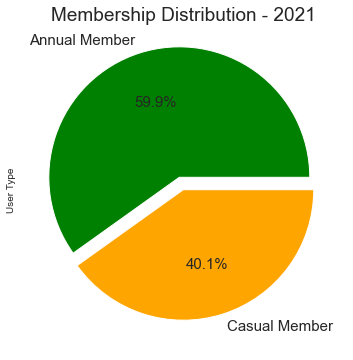

In [657]:
# Grouping data by user type
data = bike_share_2021.groupby("User Type")["User Type"].count()
data
colors = ['green','orange']
pie, ax = plt.subplots(figsize=[10,6])
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
data.plot.pie(x="user_type",explode=[0.1,0], colors=colors, autopct="%.1f%%")

plt.title("Membership Distribution - 2021", fontsize=19);

### In 2021,  60% were annual members

### Ridership per month -

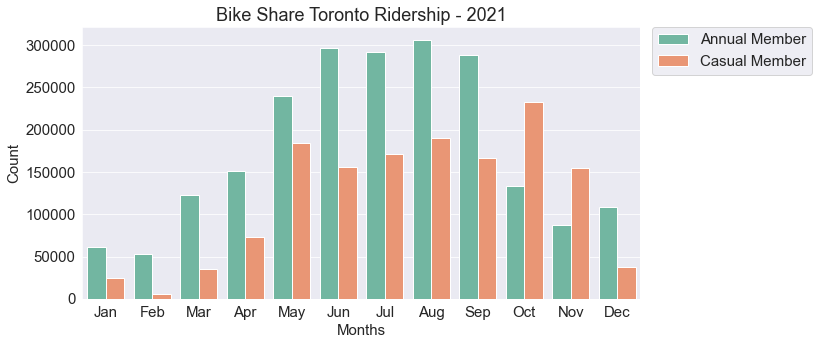

In [658]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share_2021, x='month_start', hue='User Type', palette='Set2')
plt.title('Bike Share Toronto Ridership - 2021')
plt.xlabel("Months")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### The amount of rides increased as the weather got warmer as seen above. Ridership peaked during the summer months.

### Ridership per day -

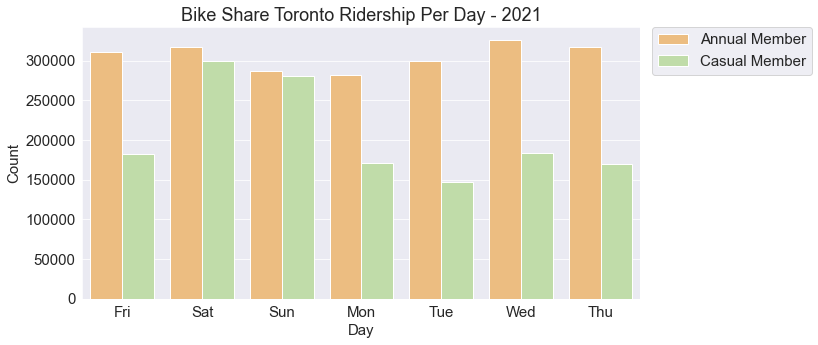

In [659]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share_2021, x='weekday_start', hue='User Type', palette="Spectral")
plt.title('Bike Share Toronto Ridership Per Day - 2021')
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### Annual members were using bikeshare all week whereas the casual members rode mostly during weekends

### Ridership per hour -

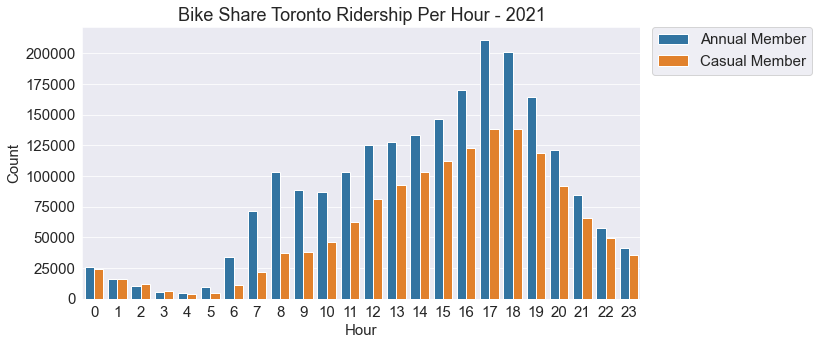

In [660]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share_2021, x='hour_start', hue='User Type', palette="tab10")
plt.title('Bike Share Toronto Ridership Per Hour - 2021')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### Annual and casual memebrs rode mostly during 4 to 5 pm

### Finding the top stations for annual members -

Text(0.5, 1.0, 'Top 5 Departing Stations (Annual Members) - 2021')

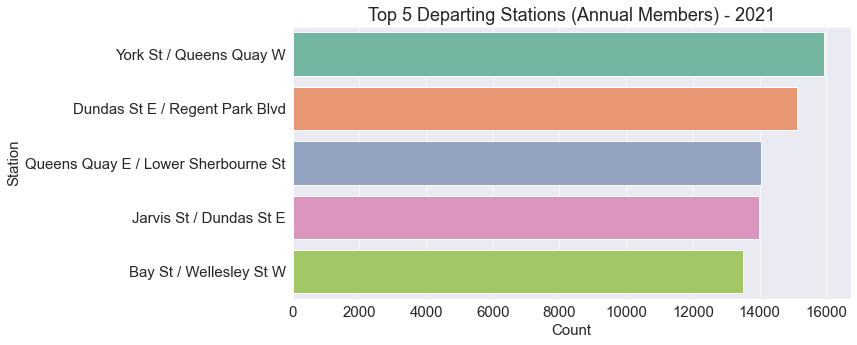

In [661]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share_2021[bike_share_2021['User Type']=='Annual Member']['Start Station Name'],data=bike_share_2021, palette='Set2',order=bike_share_2021[bike_share_2021['User Type']=='Annual Member']['Start Station Name'].value_counts().index[:5])
plt.xlabel("Count")
plt.ylabel("Station")
plt.title('Top 5 Departing Stations (Annual Members) - 2021')

Text(0, 0.5, 'Station')

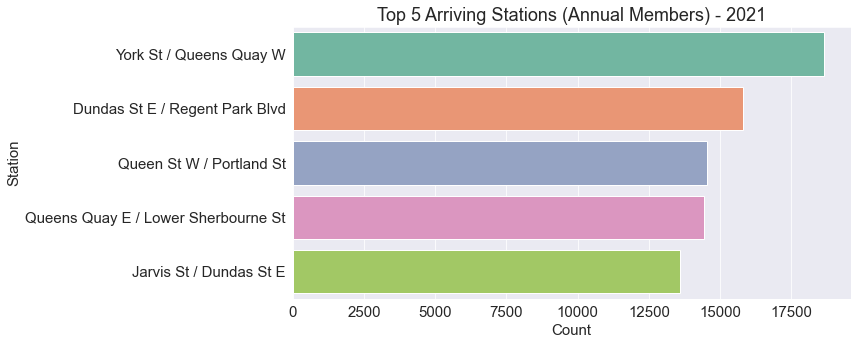

In [662]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share_2021[bike_share_2021['User Type']=='Annual Member']['End Station Name'],data=bike_share_2021, palette='Set2',order=bike_share_2021[bike_share_2021['User Type']=='Annual Member']['End Station Name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Annual Members) - 2021')
plt.xlabel("Count")
plt.ylabel("Station")

### Top stations for casual members - 

Text(0, 0.5, 'Station')

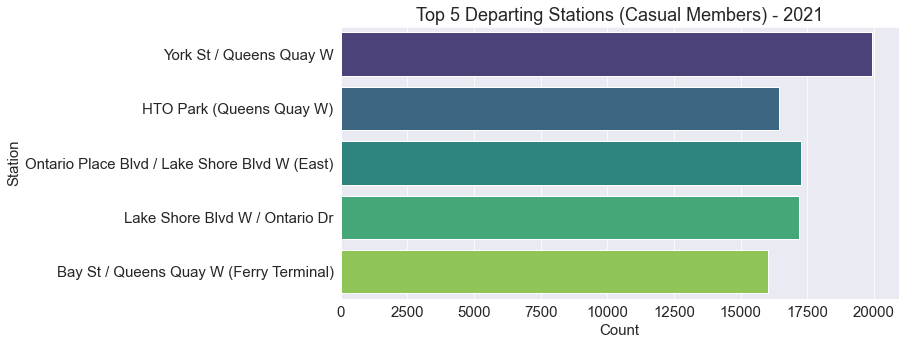

In [663]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share_2021[bike_share_2021['User Type']=='Casual Member']['Start Station Name'],data=bike_share_2021, palette='viridis',order=bike_share_2021[bike_share_2021['User Type']=='Casual Member']['End Station Name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations (Casual Members) - 2021')
plt.xlabel("Count")
plt.ylabel("Station")

Text(0, 0.5, 'Station')

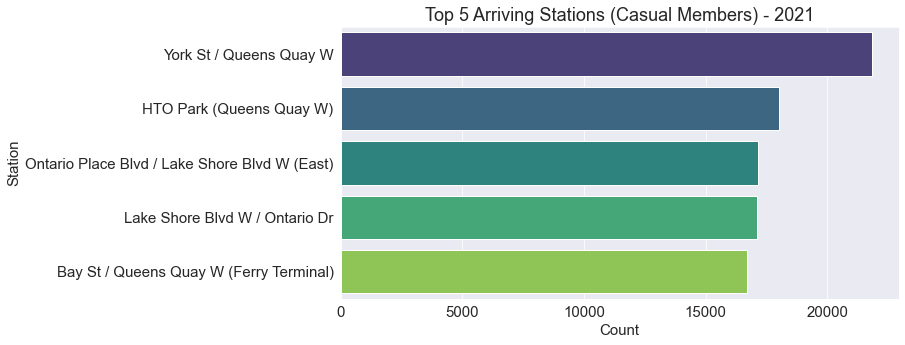

In [667]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share_2021[bike_share_2021['User Type']=='Casual Member']['End Station Name'],data=bike_share_2021, palette='viridis',order=bike_share_2021[bike_share_2021['User Type']=='Casual Member']['End Station Name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Casual Members) - 2021')
plt.xlabel("Count")
plt.ylabel("Station")

### According to the visualizations from above, it is visible that York St/Queens Quay W is the top station for arrival and departing station for both Annual and Casual Users. Therefore, deployment of more bikes at this station is highy recommended.

### I'm going to create a heat map to see the daily activity. Before I create heatmap, I'll group the DataFrame by the hour and the day of the week:

In [665]:
daily_activity = bike_share_2021.groupby(by=['weekday_start','hour_start']).count()['User Type'].unstack()
daily_activity.head()

hour_start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday_start,,,,,,,,,,,,,,,,,,,,,
Fri,6863,3970,2423,1294,1154,2230,7288,15088,22482,18618,...,29849,33674,39768,47289,46738,39592,30100,21682,16645,13878
Mon,5396,3041,1943,1084,1013,1969,6962,14039,20667,16452,...,27570,30795,37086,46834,45230,38159,27962,18786,12660,8462
Sat,10674,8001,6211,3363,1554,1578,3363,6969,12082,19103,...,52438,55073,54026,52113,48760,41378,31686,23585,18060,14544
Sun,11287,8775,6468,4016,1802,1487,3067,5953,9737,16287,...,50628,51270,49351,48456,45691,38431,29231,19986,13995,9164
Thu,5992,3119,1893,968,1035,2382,7798,16156,24674,18990,...,26607,30129,38361,51224,50367,41392,31126,21580,15110,11142


Text(83.0, 0.5, 'Day')

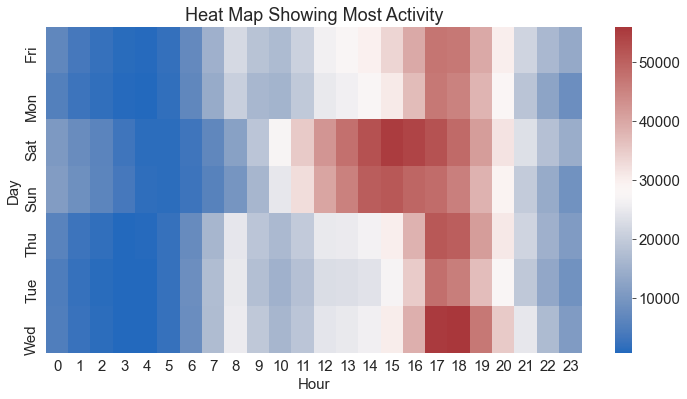

In [666]:
plt.figure(figsize=(12,6))
sns.heatmap(daily_activity,cmap='vlag')
plt.title("Heat Map Showing Most Activity")
plt.xlabel("Hour")
plt.ylabel("Day")

### Most of the acitivity occured between 5 to 6pm each day and highest activity is seen to be on Wednesday during the same time

